<a href="https://colab.research.google.com/github/JinhyunJoeng/ProjectContent-AI-/blob/main/AI_06_%EC%A0%95%EC%A7%84%ED%98%84_Project_sectoion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========1000보다 작은 Year의 값의 수는 94개. 해당 셀 드랍하자! ========
 Name           94
Platform       94
Year           94
Genre          94
Publisher      94
NA_Sales       94
EU_Sales       94
JP_Sales       94
Other_Sales    94
dtype: int64

========Data shape========
 (15719, 9)

========Data Type========
 Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

========Data Describe========
                Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales
count  15465.000000  15719.000000  15719.000000  15719.000000  15719.000000
mean    2006.403750      0.262687      0.145495      0.076813      0.048160
std        5.830935      0.817574      0.506817      0.305542      0.191749
min     1980.000000      0.000000      0.000000      0.000000      0.000000
25%     2003.000000      0.000000      0.000000      0.000000      

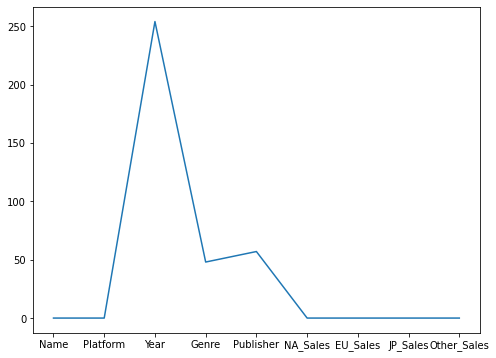

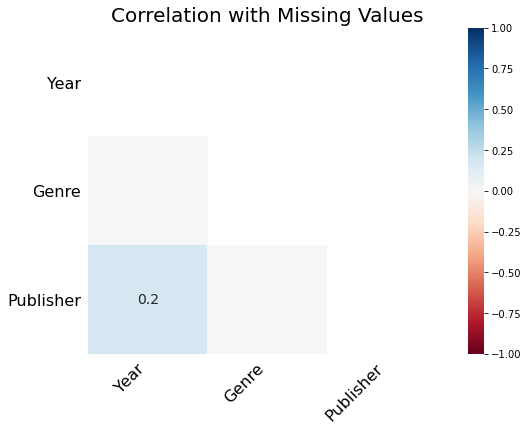

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코드스테이츠(AI bootcamp)/4week(Project)/vgames2.csv',index_col=0)
#( 목표 )Goal 다음 분기에 어떤 게임을 설계해야 할까 


##################  M, K Drop 처리 ##################
#Data중 M , K가 존재하는것으로 확인. 몇개 있는지 확인 
# 16600개중에 800개 누락이므로 Drop 처리
for str_ in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    df = df.drop(df[ df[str_].str.contains('K')==True].index)
    df = df.drop(df[ df[str_].str.contains('M')==True].index)
    df[str_]=pd.to_numeric(df[str_])
#'NA_Sales' 16398 rows × 9 columns 200개
#EU_Sales 16200 rows × 9 columns 198개
#JP_Sales 16005 rows × 9 columns 195개
#Other_Sales 15813 rows × 9 columns 192개

##################  이상한 숫자는 어떻게 처리 할까?  ##################
##################  Year 자리수 drop ##################
print("\n========1000보다 작은 Year의 값의 수는 94개. 해당 셀 드랍하자! ========\n", df[ df['Year'] <1000 ].count())
df = df.drop(df[ df['Year'] < 1000 ].index)

print("\n========Data shape========\n" , df.shape)
print("\n========Data Type========\n" , df.dtypes)
print("\n========Data Describe========\n", df.describe())
print("\n========Check N/A========\n", df.isnull().sum())
print("\n========Check N/A ratio ========\n", pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio']))
print("\n========N/A Graph ========\n")

        
##################  결측치를 어떻게 처리 할까?  ##################
df.isnull().sum().plot(figsize = (8,6))
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.heatmap(df[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize = 20)
print("\n========결측치 feature 간에 상관관계가 없어보이므로 누락 처리 진행========\n")
print("\n========결측치 상관관계(1) Year - Sales========\n",df.corr())
print("(결론) MCAR : Missing completely at random 이므로 제거! 15476 rows × 9 columns ")
df = df.dropna()


 가장 많은 배포된 장르 순위 : (1) Action (2) Sports (3) Misc (4) Role-Playing

 최근 10년동안 가장 많이 배포가 된 장르는 (1) Action  (2) Role-Playing  (3) Adventure (4) Simulation 


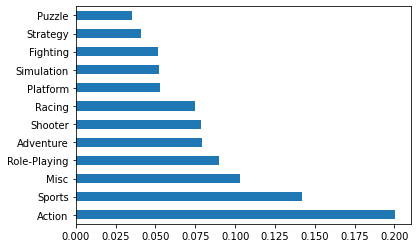

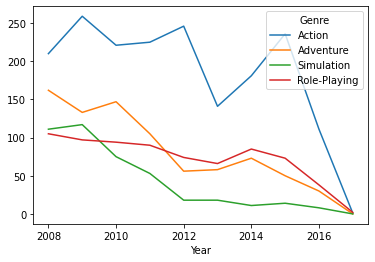

In [77]:
##################  Bivariate Analysis  ##################
##(1) Year 와 Genre 관계 : 전체 기간동안 어떤 장르가 많이 나왔는가?
df['Genre'].value_counts(normalize=True).plot.barh()
print("\n 전체 기간동안 가장 많은 배포된 장르 순위 : (1) Action (2) Sports (3) Misc (4) Role-Playing")

##최근 10년간 추세 확인
pp_crosstab = pd.crosstab(index=df["Year"], columns=df["Genre"])
df_ns = pp_crosstab.tail(10)
df_ns.mean()
df_ns = df_ns[['Action','Adventure','Simulation','Role-Playing']]
df_ns.plot()
print("\n 최근 10년동안 가장 많이 배포가 된 장르는 (1) Action  (2) Role-Playing  (3) Adventure (4) Simulation ")

In [88]:
pp_crosstab.mean().sort_values(ascending=False)

Platform
DS      53.157895
PS2     52.973684
PS3     32.289474
Wii     32.026316
X360    30.815789
PSP     29.736842
PS      29.315789
PC      23.263158
XB      19.947368
GBA     19.552632
GC      13.394737
3DS     12.473684
PSV     10.131579
PS4      8.157895
N64      7.842105
SNES     5.921053
XOne     5.421053
SAT      4.157895
WiiU     3.605263
2600     2.973684
GB       2.447368
NES      2.394737
DC       1.315789
GEN      0.657895
NG       0.315789
SCD      0.157895
WS       0.157895
3DO      0.078947
TG16     0.052632
PCFX     0.026316
GG       0.026316
dtype: float64


전체기간 동안  platform중에 DS가 차지하는 비율이 높다는걸 알수 있음. DS --> PS2 --> PS3...

최근 10년간 가장 많은 platform 순위는 (1)DS (2) PS2 (3)PS3 (4)Wii (5) X360 (6)PSP (7)PS (8) PC (9) PC ..(10)PSV

 PSV가 최신 Platform으로 가장 많은 게임을 포함 시키고 있다. 따라서 PSV로 Platform으로 제작 해야한다 
 


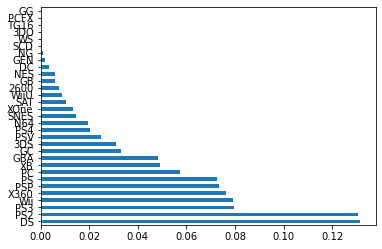

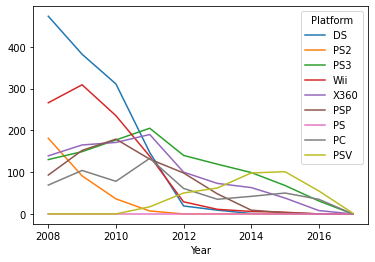

In [89]:
##################  Bivariate Analysis  ##################
##(2) Paltform과 year 관계 : 해가 갈수록 Platform \
df['Platform'].value_counts(normalize=True).plot.barh()
print('\n전체기간 동안  platform중에 DS가 차지하는 비율이 높다는걸 알수 있음. DS --> PS2 --> PS3...\n')


##최근 10년간 추세 확인
pp_crosstab = pd.crosstab(index=df["Year"], columns=df["Platform"])

pp_crosstab.mean().sort_values(ascending=False)
print("최근 10년간 가장 많은 platform 순위는 (1)DS (2) PS2 (3)PS3 (4)Wii (5) X360 (6)PSP (7)PS (8) PC (9) PC ..(10)PSV")
df_ns = pp_crosstab.tail(10)
df_ns = df_ns[['DS','PS2','PS3','Wii','X360','PSP','PS','PC','PSV']]
df_ns.plot()

print('\n PSV가 최신 Platform으로 가장 많은 게임을 포함 시키고 있다\n ')


In [106]:
pp_crosstab.tail(10).mean().sort_values(ascending=False)

Publisher
Namco Bandai Games              54.6
Electronic Arts                 54.3
Activision                      52.2
Ubisoft                         49.7
Konami Digital Entertainment    30.6
                                ... 
Max Five                         0.0
Maxis                            0.0
Media Factory                    0.0
Media Rings                      0.0
10TACLE Studios                  0.0
Length: 562, dtype: float64


 전체 기간동안 Platform이 많은 순위 (1)Electronic Arts (2) Activision  (3)Namco Bandai Games (4)Ubisoft (5) Konami Digital Entertainment (6)THQ (7)Nintendo (8) Sony Computer Entertainment (9) Sega (10)Take-Two Interactive 

최근 10년간 가장 많은 platform 순위는 Namco Bandai Games ,Electronic Arts,Activision,Ubisoft,Konami Digital Entertainment,THQ,Sega,Take-Two Interactive,Nintendo,Sony Computer Entertainment 


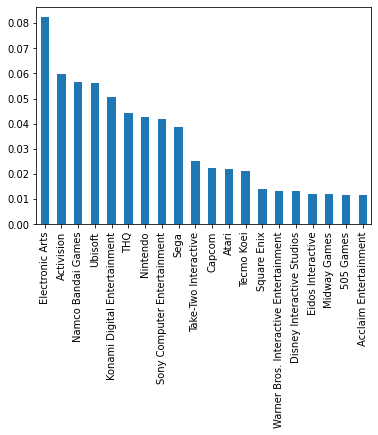

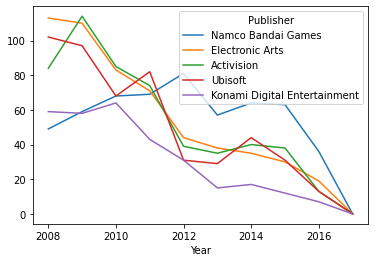

In [107]:
##################  Bivariate Analysis  ##################
##(3) Publisher , Year 관계, 최신에 게임을 제작 한 회사는 어디인가?
df['Publisher'].value_counts(normalize=True).head(20).plot.bar()
print('\n 전체 기간동안 Publisher 많은 순위 (1)Electronic Arts (2) Activision  (3)Namco Bandai Games (4)Ubisoft (5) Konami Digital Entertainment (6)THQ (7)Nintendo (8) Sony Computer Entertainment (9) Sega (10)Take-Two Interactive \n')

##최근 10년간 추세 확인
pp_crosstab = pd.crosstab(index=df["Year"], columns=df["Publisher"])
pp_crosstab.tail(10).mean().sort_values(ascending=False)
print("최근 10년간 가장 많은 Publisher 순위는 Namco Bandai Games ,Electronic Arts,Activision,Ubisoft,Konami Digital Entertainment,THQ,Sega,Take-Two Interactive,Nintendo,Sony Computer Entertainment ")
df_ns = pp_crosstab.tail(10)
df_ns = df_ns[['Namco Bandai Games','Electronic Arts','Activision','Ubisoft','Konami Digital Entertainment']]
df_ns.plot()


In [108]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [160]:
from scipy.stats import chi2_contingency
import numpy as np
from scipy import stats

##################  Bivariate Analysis  ##################
##(4) 지역에 따라 게임 장르 간의 관계
df_A = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_B = df_A.groupby(df['Genre']).mean()
df_NA=df_B['NA_Sales'].sort_values(ascending=False)
df_EU=df_B['EU_Sales'].sort_values(ascending=False)
df_JP=df_B['JP_Sales'].sort_values(ascending=False)
df_ETC=df_B['Other_Sales'].sort_values(ascending=False)

#(NA지역) 내림차순으로 정렬시 Platform의 비율이 가장 높음.. 
df_NA
print("\n NA 지역의 경우 Platform --> Shooter --> Racing --> Sports 순으로 우선순위가 큼")
#(EU지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
df_EU
print("\n EU 지역의 경우 Shooter --> Platform --> Racing --> Sports 순으로 우선순위가 큼")
#(JP지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
df_JP
print("\n JP 지역의 경우 Role-Playing --> Platform --> PUzzle --> Fightting 순으로 우선순위가 큼")
#(JP지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
df_ETC
print("\n ETC 지역의 경우 Shooter--> Racing --> Platform --> Sports 순으로 우선순위가 큼")

print("\n NA 지역 판매율 : \n",df_NA.mean())
print("\n EU 지역 판매율 : \n",df_EU.mean())
print("\n JP 지역 판매율 : \n",df_JP.mean())
print("\n ETC 지역 판매율 : \n",df_ETC.mean())
print(" NA 지역의 판매율이 가장 높다 ")


 NA 지역의 경우 Platform --> Shooter --> Racing --> Sports 순으로 우선순위가 큼

 EU 지역의 경우 Shooter --> Platform --> Racing --> Sports 순으로 우선순위가 큼

 JP 지역의 경우 Role-Playing --> Platform --> PUzzle --> Fightting 순으로 우선순위가 큼

 ETC 지역의 경우 Shooter--> Racing --> Platform --> Sports 순으로 우선순위가 큼

 NA 지역 판매율 : 
 0.2607921510509838

 EU 지역 판매율 : 
 0.14055222888052346

 JP 지역 판매율 : 
 0.08467621362849054

 ETC 지역 판매율 : 
 0.04428831577231043
 NA 지역의 판매율이 가장 높다 



===============NA 지역의 가장 높은 판매율 ==============
 Wii Sports  / 값 : 41.49

===============EU 지역의 가장 높은 판매율 ==============
 Wii Sports  / 값 : 29.02

===============JP 지역의 가장 높은 판매율 ==============
 Pokemon Red/Pokemon Blue  / 값 : 10.22

===============ETC 지역의 가장 높은 판매율 ==============
 Grand Theft Auto: San Andreas  / 값 : 10.57


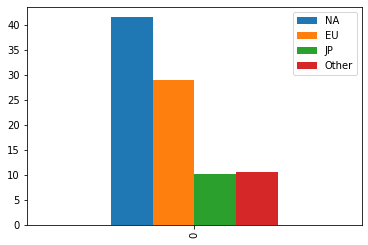

In [224]:
##################  Bivariate Analysis  ##################
##(5) 판매율이 높은~ 게임 분석, 각 지역에서 판매율이 가장 높은 게임을 조사!
print("\n===============NA 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['NA_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['NA_Sales'].idxmax()]['NA_Sales'])
print("\n===============EU 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['EU_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['EU_Sales'].idxmax()]['EU_Sales'])
print("\n===============JP 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['JP_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['JP_Sales'].idxmax()]['JP_Sales'])
print("\n===============ETC 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['Other_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['Other_Sales'].idxmax()]['Other_Sales'])
data_=pd.DataFrame({'NA':[df.loc[df['NA_Sales'].idxmax()]['NA_Sales']], 'EU':[df.loc[df['EU_Sales'].idxmax()]['EU_Sales']], 'JP' :[df.loc[df['JP_Sales'].idxmax()]['JP_Sales']],'Other' : [df.loc[df['Other_Sales'].idxmax()]['Other_Sales']] })
data_.plot.bar()


In [225]:
print("\n 최근 10년동안 가장 많이 배포가 된 장르는 (1) Action  (2) Role-Playing  (3) Adventure (4) Simulation ")
print('\n PSV가 최신 Platform으로 가장 많은 게임을 포함 시키고 있다\n ')
print("최근 10년간 가장 많은 Publisher 순위는 Namco Bandai Games ,Electronic Arts,Activision,Ubisoft,Konami Digital Entertainment,THQ,Sega,Take-Two Interactive,Nintendo,Sony Computer Entertainment ")
print("\n NA 지역 판매율 : \n",df_NA.mean())
print("\n EU 지역 판매율 : \n",df_EU.mean())
print("\n JP 지역 판매율 : \n",df_JP.mean())
print("\n ETC 지역 판매율 : \n",df_ETC.mean())
print(" NA 지역의 판매율이 가장 높다 ")
#(NA지역) 내림차순으로 정렬시 Platform의 비율이 가장 높음.. 
print("\n NA 지역의 경우 Platform --> Shooter --> Racing --> Sports 순으로 우선순위가 큼")
#(EU지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
print("\n EU 지역의 경우 Shooter --> Platform --> Racing --> Sports 순으로 우선순위가 큼")
#(JP지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
print("\n JP 지역의 경우 Role-Playing --> Platform --> PUzzle --> Fightting 순으로 우선순위가 큼")
#(JP지역) 내림차순으로 정렬시 Shooter의 비율이 가장 높음.. 
print("\n ETC 지역의 경우 Shooter--> Racing --> Platform --> Sports 순으로 우선순위가 큼")
print("\n===============NA 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['NA_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['NA_Sales'].idxmax()]['NA_Sales'])
print("\n===============EU 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['EU_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['EU_Sales'].idxmax()]['EU_Sales'])
print("\n===============JP 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['JP_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['JP_Sales'].idxmax()]['JP_Sales'])
print("\n===============ETC 지역의 가장 높은 판매율 ==============\n" ,df.loc[df['Other_Sales'].idxmax()]['Name'] ," / 값 :", df.loc[df['Other_Sales'].idxmax()]['Other_Sales'])




 최근 10년동안 가장 많이 배포가 된 장르는 (1) Action  (2) Role-Playing  (3) Adventure (4) Simulation 

 PSV가 최신 Platform으로 가장 많은 게임을 포함 시키고 있다
 
최근 10년간 가장 많은 Publisher 순위는 Namco Bandai Games ,Electronic Arts,Activision,Ubisoft,Konami Digital Entertainment,THQ,Sega,Take-Two Interactive,Nintendo,Sony Computer Entertainment 

 NA 지역 판매율 : 
 0.2607921510509838

 EU 지역 판매율 : 
 0.14055222888052346

 JP 지역 판매율 : 
 0.08467621362849054

 ETC 지역 판매율 : 
 0.04428831577231043
 NA 지역의 판매율이 가장 높다 

 NA 지역의 경우 Platform --> Shooter --> Racing --> Sports 순으로 우선순위가 큼

 EU 지역의 경우 Shooter --> Platform --> Racing --> Sports 순으로 우선순위가 큼

 JP 지역의 경우 Role-Playing --> Platform --> PUzzle --> Fightting 순으로 우선순위가 큼

 ETC 지역의 경우 Shooter--> Racing --> Platform --> Sports 순으로 우선순위가 큼

===============NA 지역의 가장 높은 판매율 ==============
 Wii Sports  / 값 : 41.49

===============EU 지역의 가장 높은 판매율 ==============
 Wii Sports  / 값 : 29.02

===============JP 지역의 가장 높은 판매율 ==============
 Pokemon Red/Pokemon Blue  / 값 : 10.22

===============E

위 데이터들을 종합하면 아래와 같은 정보를 얻을 수 있다.
(1) 최근 10년동안 가장 많이 배포가 된 장르는 Action이다. 
(2) PSV 플랫폼으로 가장 많이 게임이 나왔으며
(3) 최근 10년동안 가장 많이 배포한 회사는 Bandai이다.
(4) NA 지역의 판매율이 가장 높았으며,
(5) NA지역은 Platform, EU지역은 Shooter장르 , JP 지역은 Role-playing이 인기가 많은것으로 확인 되었다.

따라서, 다음 분기에서는 PSV 플랫폼으로 Bandia 배포사로 사용하며 판매율이 가장 높은 NA지역 타켓으로 Platform으로 배포를 하면 좋을 것 같다.